# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting into the Training set and the Test set

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scailing

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Naive Bayes model on the Training set

In [4]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Predicting a new result

In [5]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


# Predicting the Test set results

In [6]:
print(np.concatenate((y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[65  3]
 [ 7 25]]
0.9


# Visualizing the Training set results

C:\Users\LG\AppData\Local\Temp\ipykernel_18920\4256663551.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


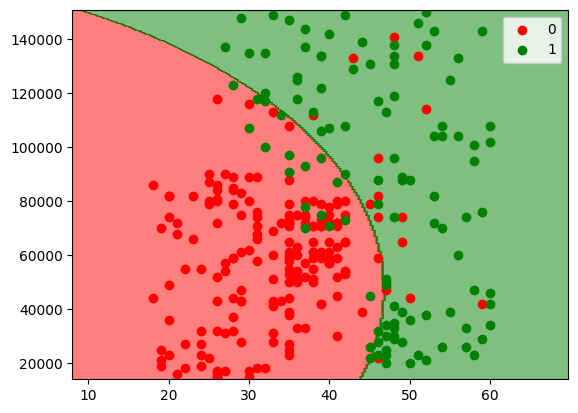

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.legend()
plt.show()

# Visualizing the Test set results

C:\Users\LG\AppData\Local\Temp\ipykernel_18920\42611579.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test_set[y_test_set == j, 0], X_test_set[y_test_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


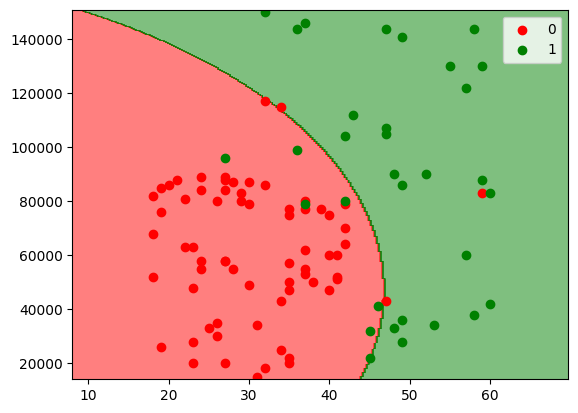

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_test_set, y_test_set = sc.inverse_transform(X_test), y_test

X1_test, X2_test = np.meshgrid(np.arange(X_test_set[:, 0].min() - 10, X_test_set[:, 0].max() + 10, 0.25), 
                               np.arange(X_test_set[:, 1].min() - 1000, X_test_set[:, 1].max() + 1000, 0.25))
plt.contourf(X1_test, X2_test, classifier.predict(sc.transform(np.array([X1_test.ravel(), X2_test.ravel()]).T)).reshape(X1_test.shape), alpha = 0.5, cmap = ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_test_set)):
    plt.scatter(X_test_set[y_test_set == j, 0], X_test_set[y_test_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.legend()
plt.show()